<a href="https://colab.research.google.com/github/lauraluebbert/cellxgene-census/blob/main/docs/notebooks/api_demo/gget_cellxgene_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Querying data using the [gget cellxgene](https://pachterlab.github.io/gget/cellxgene.html) module

[gget](https://github.com/pachterlab/gget) is a free, open-source command-line tool and Python package that enables efficient querying of genomic databases. gget consists of a collection of separate but interoperable modules, each designed to facilitate one type of database querying in a single line of code.

The [gget cellxgene](https://pachterlab.github.io/gget/cellxgene.html) module builds on the [CZ CELLxGENE Discover Census](https://github.com/chanzuckerberg/cellxgene-census) to query data from [CZ CELLxGENE Discover](https://cellxgene.cziscience.com/). It supports the querying of AnnData metadata . 

This notebook briefly introduces the gget cellxgene module by providing one simple example for each supported query type.

**Contents:**  
1. Install gget
2. Fetch an [AnnData](https://anndata.readthedocs.io/en/latest/) object by selecting gene(s), tissue(s) and/or cell type(s)
3. Plot a dot plot similar to those shown on the  CZ CELLxGENE Discover [gene expression explorer](https://cellxgene.cziscience.com/gene-expression)
4. Fetch only metadata (corresponds to AnnData.obs)
5. Use [gget cellxgene](https://pachterlab.github.io/gget/cellxgene.html) from the command line

## Install gget

In [13]:
!pip install -q gget
import gget

In [15]:
# Display all options of the cellxgene gget module
help(gget.cellxgene)

Help on function cellxgene in module gget.gget_cellxgene:

cellxgene(species='homo_sapiens', gene=None, ensembl=False, column_names=['dataset_id', 'assay', 'suspension_type', 'sex', 'tissue_general', 'tissue', 'cell_type'], anndata=True, tissue=None, cell_type=None, development_stage=None, disease=None, sex=None, is_primary_data=True, dataset_id=None, tissue_general_ontology_term_id=None, tissue_general=None, assay_ontology_term_id=None, assay=None, cell_type_ontology_term_id=None, development_stage_ontology_term_id=None, disease_ontology_term_id=None, donor_id=None, self_reported_ethnicity_ontology_term_id=None, self_reported_ethnicity=None, sex_ontology_term_id=None, suspension_type=None, tissue_ontology_term_id=None, verbose=True, out=None)
    Query data from CZ CELLxGENE Discover (https://cellxgene.cziscience.com/) using the
    CZ CELLxGENE Discover Census (https://github.com/chanzuckerberg/cellxgene-census).
    
    NOTE: Querying large datasets requires a large amount of RAM. 

## Fetch an [AnnData](https://anndata.readthedocs.io/en/latest/) object by selecting gene(s), tissue(s) and/or cell type(s)
You can use all of the options listed above to filter for data of interest. Here, we will demonstrate the module by fetching a small dataset containing only three genes and two lung cell types.

In [16]:
# Fetch AnnData object based on specified genes, tissue and cell types
adata = gget.cellxgene(
    gene = ["ACE2", "ABCA1", "SLC5A1"],
    tissue = "lung",
    cell_type = ["mucus secreting cell", "neuroendocrine cell"]
)

Let's look at some of the features of the AnnData object we just fetched:

In [17]:
adata

AnnData object with n_obs × n_vars = 3322 × 3
    obs: 'dataset_id', 'assay', 'suspension_type', 'sex', 'tissue_general', 'tissue', 'cell_type', 'is_primary_data'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_length'

3322 cells from CZ CELLxGENE Discover matched the filters specified above and their expression matrices in lung mucus secreting and neuroendocrine cells was fetched. The .var and .obs layers contain additional information about each gene and cell, respectively:

In [18]:
adata.var.head()

,soma_joinid,feature_id,feature_name,feature_length
0,2192,ENSG00000100170,SLC5A1,5081
1,6159,ENSG00000130234,ACE2,9739
2,11349,ENSG00000165029,ABCA1,11343


In [19]:
adata.obs.head()

,dataset_id,assay,suspension_type,sex,tissue_general,tissue,cell_type,is_primary_data
0,d8da613f-e681-4c69-b463-e94f5e66847f,10x 3' v3,nucleus,female,lung,lung,mucus secreting cell,True
1,d8da613f-e681-4c69-b463-e94f5e66847f,10x 3' v3,nucleus,female,lung,lung,mucus secreting cell,True
2,d8da613f-e681-4c69-b463-e94f5e66847f,10x 3' v3,nucleus,female,lung,lung,mucus secreting cell,True
3,d8da613f-e681-4c69-b463-e94f5e66847f,10x 3' v3,nucleus,female,lung,lung,mucus secreting cell,True
4,d8da613f-e681-4c69-b463-e94f5e66847f,10x 3' v3,nucleus,female,lung,lung,mucus secreting cell,True


## Plot a dot plot similar to those shown on the  CZ CELLxGENE Discover [gene expression explorer](https://cellxgene.cziscience.com/gene-expression)
Using the data we just fetched, we can plot a dot plot similar to those shown on the  CZ CELLxGENE Discover [gene expression explorer](https://cellxgene.cziscience.com/gene-expression) using [scanpy](https://scanpy.readthedocs.io/en/stable/):

In [20]:
import scanpy as sc
# retina increases the resolution of plots displayed in notebooks
%config InlineBackend.figure_format="retina"

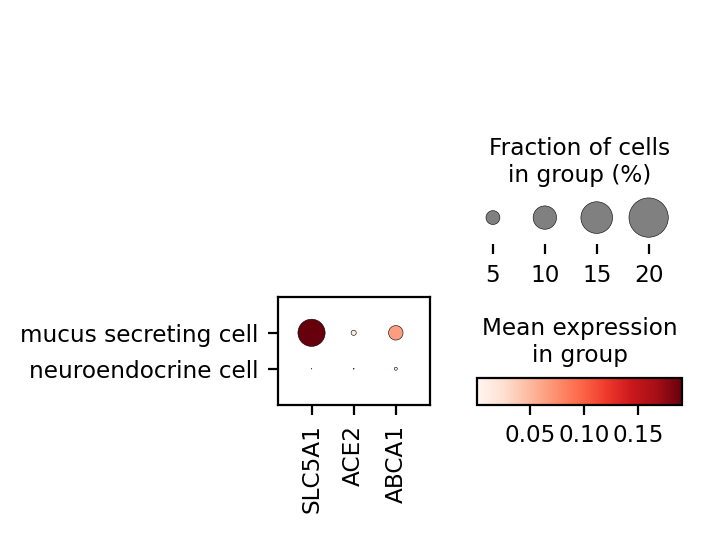

In [21]:
sc.pl.dotplot(
    adata,
    adata.var["feature_name"].values,
    groupby="cell_type",
    gene_symbols = "feature_name"
)

## Fetch only metadata (corresponds to AnnData.obs)
By setting `anndata=False` and again filtering by the cell metadata attributes listed above, you can also fetch only the dataset metadata:

In [22]:
df = gget.cellxgene(
    anndata = False,
    gene = "ENSMUSG00000015405",
    ensembl = True,           # Setting 'ensembl=True' here since the gene is passed as an Ensembl ID
    tissue = "lung",  
    species = "mus_musculus"  # Let's switch up the species
)

df

,dataset_id,assay,suspension_type,sex,tissue_general,tissue,cell_type,is_primary_data
0,047d57f2-4d14-45de-aa98-336c6f583750,10x 3' v2,cell,unknown,lung,lung,mesenchymal stem cell,True
1,047d57f2-4d14-45de-aa98-336c6f583750,10x 3' v2,cell,unknown,lung,lung,progenitor cell,True
2,047d57f2-4d14-45de-aa98-336c6f583750,10x 3' v2,cell,unknown,lung,lung,mesenchymal cell,True
3,047d57f2-4d14-45de-aa98-336c6f583750,10x 3' v2,cell,unknown,lung,lung,mesenchymal stem cell,True
4,047d57f2-4d14-45de-aa98-336c6f583750,10x 3' v2,cell,unknown,lung,lung,mesenchymal cell,True
...,...,...,...,...,...,...,...,...
97547,48b37086-25f7-4ecd-be66-f5bb378e3aea,10x 3' v2,cell,male,lung,lung,fibroblast of lung,True
97548,48b37086-25f7-4ecd-be66-f5bb378e3aea,10x 3' v2,cell,male,lung,lung,natural killer cell,True
97549,48b37086-25f7-4ecd-be66-f5bb378e3aea,10x 3' v2,cell,male,lung,lung,pulmonary interstitial fibroblast,True
97550,48b37086-25f7-4ecd-be66-f5bb378e3aea,10x 3' v2,cell,male,lung,lung,adventitial cell,True


## Use [gget cellxgene](https://pachterlab.github.io/gget/cellxgene.html) from the command line
All gget module support use from the command line. Note that the command line interface requires the `-o/--out` argument to specify a path to save the fetched data. Here are the command line versions of the queries demonstrated above:

In [25]:
# # Fetch AnnData object based on specified genes, tissue and cell types
# !gget cellxgene --gene ACE2 ABCA1 SLC5A1 --tissue lung --cell_type 'mucus secreting cell' 'neuroendocrine cell' -o example_adata.h5ad

In [24]:
# # Fetch only metadata
# !gget cellxgene --meta_only --gene ENSMUSG00000015405 --ensembl --tissue lung --species mus_musculus -o example_meta.csv